In [2]:
import utils
from importlib import reload 
reload(utils)
from utils import * 
import math
import PyQt6

a, b, c = symbols("a b c")
x, y = symbols("x y")
s, t = symbols("s t")

invariant1 = x * y 
invariant_liq1 = [(x, 10), (y,10)]
invariant2 = s * t 
invariant_liq2 = [(s, 15), (t,25)]
invariant3 = x**2 * y 
invariant_liq3 = [(x, 42), (y,35)]
# invariant3 = x * y 
# invariant_liq3 = [(x, 21), (y,35)]
invariant_liq_display1 = np.array([2, 20])
invariant_liq_display2 = np.array([5, 20])
invariant_liq_display3 = np.array([15, 45])
invariant_liq_displayc = np.array([5, 20])
invariant_liq_displays = np.array([0.5, 7.0]) # Parametric, in terms of price 

delta_f1 = invariant_to_delta(invariant1, invariant_liq1, a)
risk_av1 = 2
U_f1 = 2*b + 5*c

omega_1 = [8,2]
RES = 100


Most graphs in the paper can be reproduced by running this notebook.

In [3]:

def optim_swap_figure():
    fig = plt.figure(facecolor='white',figsize=(9,6))
    budget_curve_x, budget_curve_y = budget_curve(delta_f1, omega_1, a, resolution=RES)
    tangency_point, max_utils = opt_swap_2(delta_f1, U_f1, omega_1, [a,b,c])
    init_utils = U_f1.subs([(b, omega_1[0]), (c, omega_1[1])])
    budget_curve_interval_x = (min(budget_curve_x), max(budget_curve_x))
    indiff_curves = [indifference_curve(U_f1, max_utils, budget_curve_interval_x, [b, c], resolution=RES), \
        indifference_curve(U_f1, init_utils, budget_curve_interval_x, [b, c], resolution=RES)]

    tngt = plt.scatter(tangency_point[0], tangency_point[1], color='k', marker='o', s=70)
    init = plt.scatter(omega_1[0], omega_1[1], color='k', marker='s', s=70)
    bdgt, = plt.plot(budget_curve_x, budget_curve_y, 'k')
    for (curve_x, curve_y) in indiff_curves:
        indf, = plt.plot(curve_x, curve_y, 'k--')

    plt.xlabel(r"$\theta_1 + \Delta_1$")
    plt.ylabel(r"$\theta_2 + \Delta_2$")
    plt.legend([bdgt, indf, init, tngt], ['Budget Line', 'Indifference Curves', 'Initial Endowment', 'Max Utility'])
    plt.show()
    fig.savefig('outputs/optim_swap.png')


def invar_curve1_figure():
    fig = plt.figure(facecolor='white',figsize=(9,6))
    x_range, y_range = invariant_curve(invariant1, invariant_liq_display1, invariant_liq1, [x,y])
    invariant = plt.plot(x_range, y_range, 'k')
    init = plt.scatter(invariant_liq1[0][1], invariant_liq1[1][1], marker='s', s=70, color='k')
    plt.xlabel(r"$r_{12}$")
    plt.ylabel(r"$r_{21}$")
    plt.text(x=7.5,y=20, s=r"$x \cdot y = k$", size=25)
    plt.legend([invariant, init], ['Invariance Curve', 'Initial Liquidity'])
    plt.show()
    fig.savefig('outputs/invar_curve1.png')


def chained_curve_figures():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, facecolor='white',figsize=(27,6))
    x_range, y_range = invariant_curve(invariant1, invariant_liq_display1, invariant_liq1, [x,y])
    invariant = ax1.plot(x_range, y_range, 'k')
    init = ax1.scatter(invariant_liq1[0][1], invariant_liq1[1][1], marker='s', s=70, color='k')
    ax1.set_xlabel(r"$r_{13}$")
    ax1.set_ylabel(r"$r_{31}$")

    x_range, y_range = invariant_curve(invariant2, invariant_liq_display2, invariant_liq2, [s,t])
    invariant = ax2.plot(x_range, y_range, 'k')
    init = ax2.scatter(invariant_liq2[0][1], invariant_liq2[1][1], marker='s', s=70, color='k')
    ax2.set_xlabel(r"$r_{32}$")
    ax2.set_ylabel(r"$r_{23}$")

    invariantc, invariant_liqc = chain_pools(invariant1, invariant2, invariant_liq1, invariant_liq2)
    chained_liq_xr, chained_liq_yr = invariant_curve(invariantc, invariant_liq_displayc, invariant_liqc, [v[0] for v in invariant_liqc])
    invariant = ax3.plot(chained_liq_xr, chained_liq_yr, 'k')
    init = ax3.scatter(invariant_liqc[0][1], invariant_liqc[1][1], marker='s', s=70, color='k')
    ax3.set_xlabel(r"$r_{12}$")
    ax3.set_ylabel(r"$r_{21}$")

    plt.subplots_adjust(wspace=0.6)

    plt.show()
    fig.savefig('outputs/chained_curve.png')

    # plt.subplots_adjust(hspace=0.2)


def stacked_curve_figures():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, facecolor='white',figsize=(27,6))
    
    x_range, y_range = invariant_curve(invariant2, invariant_liq_display2, invariant_liq2, [s,t])
    invariant = ax1.plot(x_range, y_range, 'k')
    init = ax1.scatter(invariant_liq2[0][1], invariant_liq2[1][1], marker='s', s=70, color='k')
    ax1.set_xlabel(r"$r_{12}$")
    ax1.set_ylabel(r"$r_{21}$")

    x_range, y_range = invariant_curve(invariant3, invariant_liq_display3, invariant_liq3, [x,y])
    invariant = ax2.plot(x_range, y_range, 'k')
    init = ax2.scatter(invariant_liq3[0][1], invariant_liq3[1][1], marker='s', s=70, color='k')
    ax2.set_xlabel(r"$r'_{12}$")
    ax2.set_ylabel(r"$r'_{21}$")

    invariant = stack_pools_parametric(invariant2, invariant3, invariant_liq2, invariant_liq3)
    invariant_liqs = invariant(spot_price(invariant2, invariant_liq2))
    stacked_liq_xr, stacked_liq_yr = invariant_curve_parametric(invariant, invariant_liq_displays)
    invariant = ax3.plot(stacked_liq_xr, stacked_liq_yr, 'k')
    init = ax3.scatter(invariant_liqs[0], invariant_liqs[1], marker='s', s=70, color='k')
    ax3.set_xlabel(r"$r^\Sigma_{12}$")
    ax3.set_ylabel(r"$r^\Sigma_{21}$")
    # plt.text(x=9,y=40, s=r"$\psi_{13} \bigoplus \psi_{32} $", size=25)
    # plt.legend([invariant, init], ['Invariance Curve', 'Initial Liquidity'])
    plt.subplots_adjust(wspace=0.6)

    plt.show()
    fig.savefig('outputs/stacked_curve.png')

def portfolio_decision():
    theta1, theta2, theta3 = symbols("th1 th2 th3")
    p1, p2, p3 = 1, 2, 0.3
    endow1 = 7
    RES = 15
    RES2 = 10
    invariant1 = x * y 
    invariant2 = s * t 

    liq = [[[2,4], [2,8]], [[5,10], [5,20]], [[10,20], [10,40]]]
    cov_list = np.array([
        [[0.2,-0.1],[-0.1,0.2]],
        [[0.2,-0.05],[-0.05,0.2]],
        [[0.2,0],[0,0.2]],
        [[0.2,0.05],[0.05,0.2]],
        [[0.2,0.1],[0.1,0.2]],

    ])
    con_matrices = [] 
    data_range1 = []

    U_f1 = 2*b + 4*c
    triangle = np.transpose(np.array([[0,0],[0,RES2],[RES2,RES2/2]]))

    t2_range = np.linspace(0, endow1/p2, RES)
    t3_range = np.linspace(0, endow1/p3, RES)

    plt.figure(figsize=(40,6))
   
    for i_cov, cov in enumerate(cov_list):
        l = [[1000,2000], [1000,4000]]
        p3 = 0.52
        invariant_liq1 = [(x, l[0][0]), (y,l[0][1])]
        invariant_liq2 = [(s, l[1][0]), (t,l[1][1])]
        t3_range = np.linspace(0, endow1/p3, RES)
        max_con1 = expected_consumption_2T1S(U_f1, [endow1 - p2 * theta2 - p3 * theta3, theta2, theta3], invariant1, invariant2, invariant_liq1, invariant_liq2, cov, [b, c], mc_samples=30)

        con_matrix1 = np.zeros((RES2+1, RES2+1), dtype=np.float32)

        dr1_max = ((0,0), -1)

        for i in range(t2_range.shape[0]):
            for j in range(t3_range.shape[0]):
                bary = np.array([endow1 - t2_range[i] * p2 - t3_range[j] *p3, t2_range[i] * p2, t3_range[j] * p3])/endow1
                if any([x < 0 for x in bary]):
                    continue
                cart = get_cartesian_from_barycentric(bary, triangle)
                f = max_con1.subs([(theta2, t2_range[i]), (theta3, t3_range[j])]).evalf()  
                if f.is_constant():
                    coords = (int(cart[0]), int(cart[1]))
                    con_matrix1[coords] = f 
                    data_range1 += [f]
                    if f > dr1_max[1]:
                        dr1_max = (coords, f, bary)
        
        ax = plt.subplot(1,5,i_cov+1)
        con_matrices += [con_matrix1]
        ax.scatter(dr1_max[0][1], dr1_max[0][0], s=50, marker='x', color='r')

    for i_cov, _ in enumerate(cov_list):
        ax = plt.subplot(1,5,i_cov+1)
        ax.imshow(con_matrices[i_cov], origin='lower', vmin=min(data_range1), vmax=max(data_range1))

    # for q, l in enumerate(liq):
    #     invariant_liq1 = [(x, l[0][0]), (y,l[0][1])]
    #     invariant_liq2 = [(s, l[1][0]), (t,l[1][1])]
    #     max_con1 = expected_consumption_2T1S(U_f1, [endow1 - p2 * theta2 - p3 * theta3, theta2, theta3], invariant1, invariant2, invariant_liq1, invariant_liq2, [[0.3, 0.2], [0.2,0.3]], [b, c], mc_samples=15)
    #     max_con2 = expected_consumption_2T1S(U_f1, [endow1 - p2 * theta2 - p3 * theta3, theta2, theta3], invariant1, invariant2, invariant_liq1, invariant_liq2, [[0.3, 0], [0,0.3]], [b, c], mc_samples=15)
    #     max_con3 = expected_consumption_2T1S(U_f1, [endow1 - p2 * theta2 - p3 * theta3, theta2, theta3], invariant1, invariant2, invariant_liq1, invariant_liq2, [[0.3, -0.2], [-0.2,0.3]], [b, c], mc_samples=15)

    #     con_matrix1 = np.zeros((RES2+1, RES2+1))
    #     con_matrix2 = np.zeros((RES2+1, RES2+1)) 
    #     con_matrix3 = np.zeros((RES2+1, RES2+1)) 

    #     data_range1 = []
    #     dr1_max = ((0,0), -1)
    #     data_range2 = []
    #     dr2_max = ((0,0), -1)
    #     data_range3 = []
    #     dr3_max = ((0,0), -1)
    #     for i in range(t2_range.shape[0]):
    #         for j in range(t3_range.shape[0]):
    #             bary = np.array([endow1 - t2_range[i] * p2 - t3_range[j] *p3, t2_range[i] * p2, t3_range[j] * p3])/endow1
    #             if any([x < 0 for x in bary]):
    #                 continue
    #             cart = get_cartesian_from_barycentric(bary, triangle)
    #             f = max_con1.subs([(theta2, t2_range[i]), (theta3, t3_range[j])]).evalf()  
    #             if f.is_constant():
    #                 coords = (int(cart[0]), int(cart[1]))
    #                 con_matrix1[coords] = f 
    #                 data_range1 += [f]
    #                 if f > dr1_max[1]:
    #                     dr1_max = (coords, f, bary)

    #             f = max_con2.subs([(theta2, t2_range[i]), (theta3, t3_range[j])]).evalf()  
    #             if f.is_constant():
    #                 coords = (int(cart[0]), int(cart[1]))
    #                 con_matrix2[coords] = f 
    #                 data_range2 += [f]
    #                 if f > dr2_max[1]:
    #                     dr2_max = (coords, f, bary)

    #             f = max_con3.subs([(theta2, t2_range[i]), (theta3, t3_range[j])]).evalf()  
    #             if f.is_constant():
    #                 coords = (int(cart[0]), int(cart[1]))
    #                 con_matrix3[coords] = f 
    #                 data_range3 += [f]
    #                 if f > dr3_max[1]:
    #                     dr3_max = (coords, f, bary)
                


    

    #     data_range = np.concatenate((data_range1, data_range2))
    #     ax1 = plt.subplot(3,3,1 + 3*q)
    #     ax2 = plt.subplot(3,3,2 + 3*q)
    #     ax3 = plt.subplot(3,3,3 + 3*q)
    #     # ax1.imshow(con_matrix1, origin='lower', vmin=min(data_range), vmax=max(data_range))
    #     # ax1.scatter(dr1_max[0][1], dr1_max[0][0], s=50, marker='x')
    #     # ax2.imshow(con_matrix2, origin='lower', vmin=min(data_range), vmax=max(data_range))
    #     # ax2.scatter(dr2_max[0][1], dr2_max[0][0], s=50, marker='x')
    #     # ax3.imshow(con_matrix3, origin='lower', vmin=min(data_range), vmax=max(data_range))
    #     # ax3.scatter(dr3_max[0][1], dr3_max[0][0], s=50, marker='x')
    #     ax1.imshow(con_matrix1, origin='lower', vmin=min(con_matrix1[con_matrix1 > 0]))
    #     ax1.scatter(dr1_max[0][1], dr1_max[0][0], s=50, marker='x')
    #     ax2.imshow(con_matrix2, origin='lower', vmin=min(con_matrix2[con_matrix2 > 0]))
    #     ax2.scatter(dr2_max[0][1], dr2_max[0][0], s=50, marker='x')
    #     ax3.imshow(con_matrix3, origin='lower', vmin=min(con_matrix3[con_matrix3 > 0]))
    #     ax3.scatter(dr3_max[0][1], dr3_max[0][0], s=50, marker='x')

    plt.show()

def liquidity_volatility_figures():
    SAMPLES = 3000
    var1 = 0.1
    var2 = 0.1
    cov = np.linspace(-math.sqrt(var1*var2), math.sqrt(var1*var2), 20)
    var_range = np.linspace(0, 0.3, 20)

    t1, t2, w1, w2 = [10, 10, 3, 5]

    a = symbols('a')
    f_inf = lambda w1p, w2p: max(t1 * w1 / w2 * w2p + t2 * w2p, t2 * w2 / w1 * w1p + t1 * w1p)
    df = invariant_to_delta(invariant2, invariant_liq2, a)
    f_lim = lambda w1p, w2p: opt_swap_2(df, s*w2p+t*w1p, [10,10], [a,s,t], relational=False)[1]

    means_cov = np.zeros((3, len(cov)), dtype=np.float32)
    max_error_cov = 0
    means_var = np.zeros((3, len(var_range)), dtype=np.float32)
    max_error_var = 0

    # for i, c in enumerate(cov):
    #         mu1, sigma1 = liq_expected_payoff_mc([[var1, c], [c, var2]], f_inf, [w1, w2], samples=SAMPLES)
    #         means_cov[0,i] = mu1
    #         max_error_cov = max(max_error_cov, sigma1)
    #         mu2, sigma2 = liq_expected_payoff_mc([[var1, c], [c, var2]], f_lim, [w1, w2], samples=SAMPLES)
    #         means_cov[1,i] = mu2
    #         max_error_var = max(max_error_var, sigma2)
    #         means_cov[2,i] = 80*np.exp(0) 

    # print("Max error (covariance figure): ", max_error_cov/math.sqrt(SAMPLES))
    # fig = plt.figure(facecolor='white',figsize=(9,6))

    # corr = cov/(math.sqrt(var1*var2))
    # inf_liq, = plt.plot(corr, means_cov[0,:], linestyle='--', color='k')
    # lim_liq, = plt.plot(corr, means_cov[1,:], linestyle='-.', color='k')
    # no_liq, = plt.plot(corr, means_cov[2,:], linestyle='-', color='k')

    # plt.xlabel("$\\rho$, Correlation")
    # plt.ylabel('C, Max Consumption')
    # plt.xlim(1, -1)

    # plt.legend([inf_liq, lim_liq, no_liq], ['Infinite Liquidity', 'Limited Liquidity', 'No Liquidity'])
    # plt.show()
    # fig.savefig('outputs/liq_correlation.png')

    for i, v in enumerate(var_range):
            mu1, sigma1 = liq_expected_payoff_mc([[v, 0], [0, v]], f_inf, [w1, w2], samples=SAMPLES)
            means_var[0,i] = mu1
            max_error_var = max(max_error_var, sigma1)
            mu2, sigma2 = liq_expected_payoff_mc([[v, 0], [0, v]], f_lim, [w1, w2], samples=SAMPLES)
            means_var[1,i] = mu2

            max_error_var = max(max_error_var, sigma2)
            means_var[2,i] = 80*math.exp(0) 

    print("Max error (variance figure): ", max_error_var/math.sqrt(SAMPLES))
    fig = plt.figure(facecolor='white',figsize=(9,6))

    inf_liq, = plt.plot(var_range, means_var[0,:], linestyle='--', color='k')
    lim_liq, = plt.plot(var_range, means_var[1,:], linestyle='-.', color='k')
    no_liq, = plt.plot(var_range, means_var[2,:], linestyle='-', color='k')

    plt.xlabel("$\sigma^2$, Variance")
    plt.ylabel('C, Max Consumption')
    plt.xlim(0, 0.3)

    plt.legend([inf_liq, lim_liq, no_liq], ['Infinite Liquidity', 'Limited Liquidity', 'No Liquidity'])
    plt.show()
    fig.savefig('outputs/liq_variance.png')


# Cosmetics
mpl.rc('axes', labelsize=18)
mpl.rc('legend', fontsize=18)


# invar_curve1_figure()
# chained_curve_figures()
# stacked_curve_figures()
# optim_swap_figure()
# portfolio_decision()
liquidity_volatility_figures()

'''
INSIGHTS:
why store in tokens when u can always just exchange them in the future?
liq needs to reflect that
'''


In [ ]:
from sympy import * 

x, y, p = symbols('x y p')
y = 2 * x + 1 
f = x**2 * y 
p_expr = y/x
x_p = solve(p_expr - p, x)[0]

print(integrate(f.subs(x, x_p), p))
# print(integrate((x**2).subs(x, solve(x, p)[0]) , p))

(1 - p)/(p**2 - 4*p + 4)


In [110]:
from sympy import * 
from utils import *
import numpy as np 
import math 
import matplotlib.pyplot as plt 
from ipywidgets import IntProgress
from IPython.display import display
import quantecon.game_theory as gt 
import pickle 
import tqdm
from multiprocess import Pool
from scipy.optimize import minimize, Bounds, LinearConstraint 

μ = np.array([1, 1])
σ = np.array([0.05, 0.05])
m = μ.shape[0] # num of goods
l = 1 # num of tokens. fixed  
n = 3 # num of traders 
o = 2 # num of liq pools 
Π = np.vstack([np.concatenate(([max(0,x) for x in np.random.normal(μ, σ)],np.zeros(l))) for _ in range(n)])
Π = np.array([[0.4,2,0],[0.5,2,0],[0.6,2,0]])

Ω = np.zeros((n+o,m+l))
Ω[:n, :m] = np.random.random(size=(n,m)) 
Ω[:n, :m] /= np.sum(Ω[:n, :m], axis=0)

print(Π)
# Assume linear 
def ξ2(π, p, θ): 
    preferred_index = np.argmax(π/p)
    budget = p @ θ.T
    optim = np.zeros(p.shape[0])
    optim[preferred_index] = budget/p[preferred_index]
    return optim 
# Cobb douglas 
def ξ(π, p, θ): 
    budget = p @ θ.T
    return np.array([π[0] * budget / p[0], (1-π[0]) * budget / p[1], 0]) 

def CPMM(p, θ, i): 
    final = np.zeros(p.shape[0])
    final[i[0]] = np.sqrt(θ[i[0]] * θ[i[1]] * (p[i[1]] / p[i[0]]))
    final[i[1]] = np.sqrt(θ[i[0]] * θ[i[1]] / (p[i[1]] / p[i[0]]))
    
    return final 
    
def gale_nikaido(Ω, p, d):
    # Γ_1 = Ω[n] - CPMM(p, Ω[n], [0,2]) 
    # Γ_2 = Ω[n+1] - CPMM(p, Ω[n+1], [1,2])
    Γ_1 = Ω[n] - CPMM(p, Ω[n], [0,1]) 
    Γ_2 = 0
    g = np.sum(d(Ω, p) - Ω[:n, :], axis=0)
    assert p @ g.T < 1e-10, "Walras' Law violated"
    g_sum = sum(max(0,g[j] - (Γ_1[j])) for j in range(len(g)))
    return np.array([(p[i] + max(0, g[i]))/(1 + g_sum) for i in range(m+l)])

def final_allocation(Ω, p, d):
    CPMM1 = CPMM(p, Ω[n], [0,1]) 
    return np.concatenate((d(Ω, p), [CPMM1]), axis=0)


def line_search_eq(Ω, d, RES = 150, RES2 = 60, plot_result=False):
    min_pv = None 
    min_diff = 100 
    triangle = np.transpose(np.array([[0,0],[0,RES2],[RES2,RES2/2]]))
    gn_im = np.zeros((RES2, RES2))

    for p0 in np.linspace(0,1, RES):
        for p1 in np.linspace(0, 1 - p0, RES):
            pv = np.array([p0, p1, 1-p0-p1])
            if any(pv < 1e-3):
                continue
            xy = get_cartesian_from_barycentric(pv, triangle)
            diff = np.sum((gale_nikaido(Ω, pv, d) - pv)**2)
            if diff < min_diff:
                min_diff = diff 
                min_pv = pv 
            gn_im[int(xy[0]), int(xy[1])] = diff 
        
   
    if plot_result:
        plt.imshow(gn_im, origin='lower', cmap="gray_r", vmin=0, vmax=10)
        plt.Polygon(triangle.T, color='k')
        plt.show()

    print("min diff", min_diff)
    return min_pv, final_allocation(Ω, min_pv, d) 


def nonconvex_eq(Ω, d):
    sol = minimize(lambda pv: np.sum((gale_nikaido(Ω, pv, d) - pv)**2),\
        np.ones(Ω.shape[1])/Ω.shape[1], 
        bounds=Bounds(np.zeros(Ω.shape[1]), np.ones(Ω.shape[1])),
        constraints=[LinearConstraint(np.ones(Ω.shape[1]), 1, 1)])
    print("min diff", sol.fun)
    
    return sol.x, final_allocation(Ω, sol.x, d) 

def price_equilibrium(Ω, discrete_weights, γ, output_file="", RES=150):
    payoff_matrix = np.zeros([discrete_weights.shape[0]] * n + [n])

    def cartesian_recur(sample, length, index=0): 
        if index == length - 1:
            return [[s] for s in sample]
        else:
            output = [] 
            for l in cartesian_recur(sample, length, index+1):
                for s in sample:
                    output += [l + [s]]
            return output 
            
    iter_weights = cartesian_recur(range(discrete_weights.shape[0]), n)

    def compute_given_weights(indices):
        weights = np.array([discrete_weights[i] for i in indices])
        demand_function_t0 = lambda Ω, p: [ξ(weights[k], p, Ω[k]) for k in range(n)] 
        _, Θ = line_search_eq(Ω, demand_function_t0, RES=RES)
        util_arr = np.zeros((γ.shape[0], n))
        for i, γ_t in enumerate(γ):
            demand_function_t1 = lambda Ω, p: [ξ(np.multiply(Π[k], γ_t), p, Ω[k]) for k in range(n)] 
            _, final_alloc = line_search_eq(Θ, demand_function_t1, RES=RES)
            util = np.sum(Π * final_alloc[:-o,:] * γ_t, axis=1) 
            util_arr[i] = -np.exp(util)
        return (indices, np.mean(util_arr, axis=0))

    with Pool(7) as p:
        for (indices, val) in tqdm.tqdm(p.imap_unordered(compute_given_weights, iter_weights)):
            payoff_matrix[indices] = val

    with open(output_file, 'wb') as f:
        pickle.dump(payoff_matrix, f)
        
    game = gt.NormalFormGame(payoff_matrix)
    NEs = gt.pure_nash_brute(game)

    payoff_to_indices = {} 
    for NE in NEs:
        payoff = tuple(payoff_matrix[NE].tolist()) 
        if payoff not in payoff_to_indices:
            payoff_to_indices[payoff] = [] 
        payoff_to_indices[payoff] += [NE]

    output = [] 
    for payoff in payoff_to_indices:
        sample_indices = payoff_to_indices[payoff][0]
        weights = np.array([discrete_weights[i] for i in sample_indices])
        demand_function_t0 = lambda Ω, p: [ξ(weights[k], p, Ω[k]) for k in range(n)] 
        price, alloc = line_search_eq(Ω, demand_function_t0)
        output += [(price, alloc)]
    return output


[[0.4 2.  0. ]
 [0.5 2.  0. ]
 [0.6 2.  0. ]]


6.816710629219309e-06
[0.558 0.442 0.   ]
[0.556 0.518 0.   ]


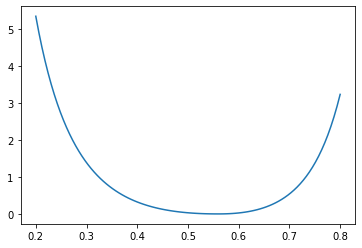

In [111]:
demand_function_t0 = lambda Ω, p: [ξ(Π[k], p, Ω[k]) for k in range(n)] 

f = lambda p: np.sum(demand_function_t0(Ω, p) - Ω[:n, :], axis=0)
p_range = np.linspace(0.2,0.8,100)
init = np.array([0.5,0.8,0])
Ω[n] = init 

def diff(p): 
    arr = f(np.array([p, 1-p,0])) - (init - CPMM(np.array([p, 1-p,0]), init,[0,1]))
    arr[arr < 0] = 0
    return sum((arr)**2)
all_diff = [diff(x) for x in p_range]
plt.plot(p_range, all_diff)
print(min(all_diff))
index = np.argmin(all_diff)
# for i in range(index -2, index+2):
#     p = p_range[i]
#     print(f(np.array([p, 1-p,0])) , (init - CPMM(np.array([p, 1-p,0]), init,[0,1])))
pv = np.array([p_range[index], 1-p_range[index], 0]) 
print(pv)
print(gale_nikaido(Ω, pv, demand_function_t0))


In [101]:
# How liquidity affects price 
discrete_weights = np.array([[1-v2-v3, v2, v3] for v3 in np.linspace(1/5, 4/5, 4) for v2 in np.linspace(1/4 * (1-v3), 3/4 * (1-v3), 3) if v2 + v3 < 1])
cov = np.array([[0.2, 0.05], [0.05, 0.3]]) * 0.4
MC_SAMPLES = 10
np.set_printoptions(precision=3)

prefix="std_2"
liq_range = np.linspace(0.2, 1, 5)
prices = np.zeros(liq_range.shape[0])
γ = np.exp(np.random.multivariate_normal([-cov[0][0]/2,-cov[1][1]/2], cov, MC_SAMPLES))
γ = np.concatenate((γ, np.zeros((MC_SAMPLES, 1))), axis=1)

print(np.mean(γ, axis=0))

demand_function_t0 = lambda Ω, p: [ξ(Π[k], p, Ω[k]) for k in range(n)] 
# Proportional allocation of liquidity
Ω[n] = np.array([0.3, 0, 0.5])
Ω[n+1] = np.array([0, 0.1, 0.5])
print(Ω)
min_pv, Ω = line_search_eq(Ω, demand_function_t0, RES=400)
print(Ω)
print(np.sum(Ω, axis=0))
print(min_pv)

# for i, liq in enumerate(liq_range):
#     # Find p (t0)
#     demand_function_t0 = lambda Ω, p: [ξ(Π[k], p, Ω[k]) for k in range(n)] 

#     min_pv, Ω = line_search_eq(Ω, demand_function_t0)
#     ω_l = np.array([liq/(2*min_pv[0]) * (min_pv[0] + min_pv[1]), liq/(2*min_pv[1]) * (min_pv[0] + min_pv[1]), 1])
#     # Proportional allocation of liquidity
#     Ω[n] = np.array([ω_l[0], 0, 0.5])
#     Ω[n+1] = np.array([0, ω_l[1], 0.5])

#     print("-----")
#     print(cov)
#     print(liq)
#     for (price, alloc) in price_equilibrium(Ω, discrete_weights, cov, γ, "outputs/NE/%s_%d.pck" % (prefix, i)):
#         prices[i] = price[2]
#         print("P: {0}".format(price))
#         print("Final Allocation:")
#         for i, line in enumerate(alloc):
#             print(i, ": ", line, " (CFMM)" if i >= n else "")
#     print()

# plt.plot(liq_range, prices, label="", linestyle='-', color='k')
# plt.plot(liq_range, liq_range / (1+liq_range), label="", linestyle='--', color='k')
# plt.xlabel(r"$\hat{\omega}$, Locked Liquidity")
# plt.ylabel(r"Token price")
# plt.savefig("outputs/tokens_vary_liq.png")
# plt.legend()
# plt.show()

[1.061 1.006 0.   ]
[[0.553 0.201 0.   ]
 [0.235 0.234 0.   ]
 [0.211 0.565 0.   ]
 [0.3   0.    0.5  ]
 [0.    0.1   0.5  ]]
min diff 0.00012393566810159449
[[0.303 0.446 0.   ]
 [0.237 0.232 0.   ]
 [0.473 0.309 0.   ]
 [0.24  0.    0.625]
 [0.    0.137 0.365]]
[1.253 1.124 0.99 ]
[0.416 0.424 0.16 ]


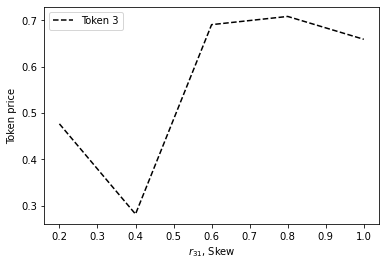